# Exploratory data analysis, EDA

In [20]:
import pandas as pd

- item_id : item id wich can be used later to merge with other IKEA dataframes
- name: the commercial name of items
- category: the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)
- Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
- old_price: the price of item in Saudi Riyals before discount
- Short_description: a brief description of the item
- full_Description: a very detailed description of the item. Because it is long, it is dropped from the final dataframe, but it is available in the code in case it needs to be analyzed.
- designer: The name of the designer who designed the item. this is extracted from the full_description column.
- size: the dimensions of the item including a lot of details.As a lot of dimensions mentioned and they vary from item to item, the most common dimensions have been extracted which are: Height, Wideh, and Depth. This column is dropped from the final dataframe, but it is available in the code in case it is needed.
- width: Width of the item in Centimeter
- height: Height of the item in Centimeter
- depth: Depth of the item in Centimeter
- sellable_Online: if the item is available for online purchasing or in-stores only (Boolean)
- other_colors: if other colors are available for the item, or just one color as displayed in the website (Boolean)
- link: the web link of the item


**Какие типы задач можно решать с данным датасетом:**

- Регрессия: Прогнозирование продажной цены новых товаров
- Классификация: Предсказать категорию новых товаров
- Классификация: Предсказать, будет ли товар со скидкой

1) Прочитать файл IKEA_SA_Furniture_Web_Scrapings.csv и записать в переменную df

In [21]:
df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings.csv')

2) Вывести первые пять строк

In [22]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


Внимательно изучите данные и попробуйте их осознать без применения пока графиков и стат параметров. Прочитайте подробнее, что значит каждое поле

3) Выведите размер датасета

In [23]:
df.size

48022

4) Вывести общую информацию о датафрейме при помощи метода info()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 350.0+ KB


5) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [25]:
df.shift()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,NaN,None,None,NaN,None,NaN,None,None,None,None,NaN,NaN,NaN
1,90420332.0,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
2,368814.0,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
3,9333523.0,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
4,80155205.0,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,89330653.0,PAX / MEHAMN/AULI,Wardrobes,2045.0,No old price,True,https://www.ikea.com/sa/en/p/pax-mehamn-auli-w...,No,"Wardrobe combination, 200x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,200.0
3690,99157902.0,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3691,9158152.0,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3692,59157541.0,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


6) Вывести основные описательные статистики для числовых признаков

In [26]:
df.mean()

C:\Users\maxim\AppData\Local\Temp\ipykernel_9804\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


item_id            4.863240e+07
price              1.078208e+03
sellable_online    9.924201e-01
depth              5.437920e+01
height             1.016800e+02
width              1.044709e+02
dtype: float64

In [27]:
df.median()

C:\Users\maxim\AppData\Local\Temp\ipykernel_9804\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


item_id            49288078.0
price                   544.7
sellable_online           1.0
depth                    47.0
height                   83.0
width                    80.0
dtype: float64

In [28]:
df.var()

C:\Users\maxim\AppData\Local\Temp\ipykernel_9804\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


item_id            8.344642e+14
price              1.889669e+06
sellable_online    7.524442e-03
depth              8.975028e+02
height             3.732915e+03
width              5.060013e+03
dtype: float64

7) Вывести основные описательные статистики для булевых и категориальных признаков

In [29]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


8) Проанализировать признак old_price, посмотреть на **уникальные значения** (понадобится в следующем задании)

In [30]:
df['old_price'].unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

9) **Написать функцию** (пока без применения) получения цены в формате float из признака **old_price** (преобразование значений признака в этой же колонке). 

Пояснение:

- Если имеем значение = 'No old price' в old_price, то оставляем исходную цену, то есть берем значение из признака **price**
- Там, где присутствует значение **pack** в old_price, нужно просто убрать все то, что идет после знака /
- Например, цена SR 5,640 в old_price читается как SR 5640 (то есть без запятой), по итогу должны получить новое значение 5640
- На вход должны подаваться значения старой и новой цены

<div class="alert alert-block alert-warning"> 
Написать функцию (пока без применения) получения цены в формате float из признака old_price


Нужно читать правильно задание, где получение цены в формате float??
</div>

In [31]:
# data_old - значение из old_price
# data_price - значение из price
# return transform old_price

def change_old_price(data_old_price: str, data_price: float) -> float:
    if data_old_price.__contains__('a'):
        if data_old_price == 'No old price':
            return data_price
    return data_old_price

In [32]:
change_old_price(df['old_price'], df['price'])

0       No old price
1       No old price
2       No old price
3       No old price
4       No old price
            ...     
3689          SR 820
3690        SR 1,755
3691        SR 1,050
3692        SR 3,130
3693        SR 1,535
Name: old_price, Length: 3694, dtype: object

10) Генерация и преобразование признаков
- Создать признак **flg_old_price**, где 0 - это означает, что есть значение **'No old price'** в признаке **old_price**, иначе поставить 1 (флаг)
- Преобразовать признак **old_price** при помощи написанной функции **change_old_price()** в задании 9
- Создать признак **discount_amount = старая цена - цена**

**Подсказка для преобразования old_price**:

```python
... = df.apply(lambda x: change_old_price(x['old_price'], x['price']), axis=1)
```

In [33]:
df['flg_old_price'] = df.apply(lambda x: change_old_price(x['old_price'], x['price']), axis=1)
df

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,flg_old_price
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,No old price
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,No old price
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,No old price
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,No old price
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,No old price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0,SR 820
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0,"SR 1,755"
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0,"SR 1,050"
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0,"SR 3,130"


<div class="alert alert-block alert-success">
    
Представим, что мы будем решать задачу регрессии и на новых товарах предсказывать **новую** цену.

С учетом этого выдвините свои гипотезы далее
</div>

## 1 Гипотеза

- Старые и новые цены отличаются друг от друга, новые цены выше

Построить график распределения старой и текущих цен (уместить на одном графике), есть ли видимые отличия?

C:\Users\maxim\AppData\Local\Temp\ipykernel_9804\333796266.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=False, rug=True, bins=10)


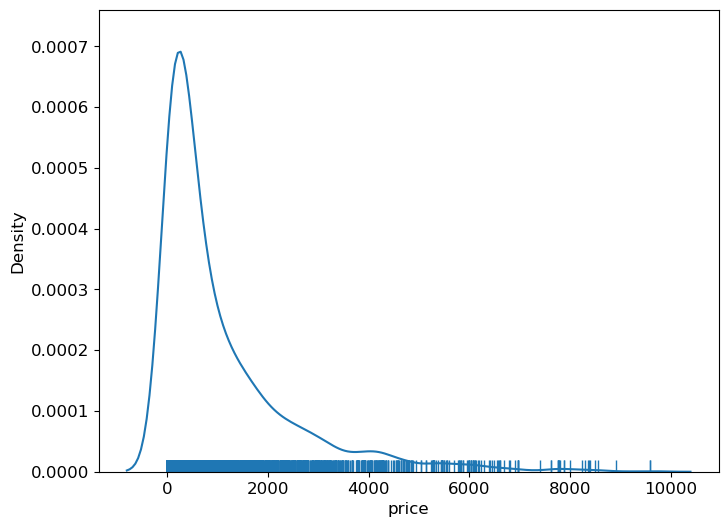

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams.update({'font.size': 12})

x = np.linspace(-1, 1, 250)
f, ax = plt.subplots(figsize=(8,6))
x = df['price']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

<div class="alert alert-block alert-warning"> 
Как то понятнее график нужно сделать
</div>

**Сделайте выводы**

Если график построен верно то видимые отличия на лицо.

## 2 Гипотеза

- Текущие цены онлайн и оффлайн не отличаются в разрезе наличия скидки (можно использовать признак flg_old_price)

<div class="alert alert-block alert-warning"> 
Читаем правильно задание
</div>

Сравнить при помощи boxplot и displot текущую цену при разных значениях sellable_online, есть ли разница?

Для графика boxplot также проанализировать различия в разрезе flg_old_price (параметр hue)

C:\Users\maxim\AppData\Local\Temp\ipykernel_14352\2436017819.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


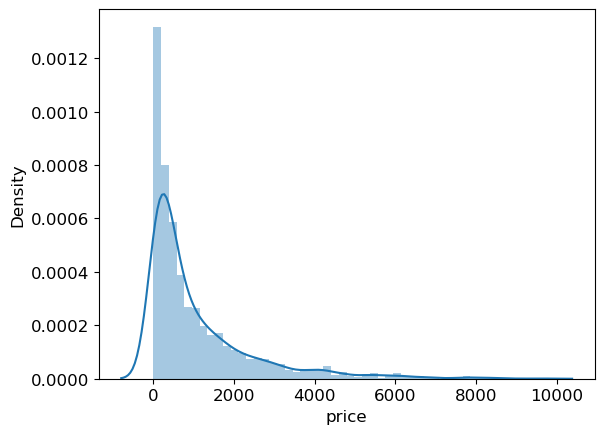

In [62]:
#create boxplot of one column
sns.distplot(df['price']);

<Axes: >

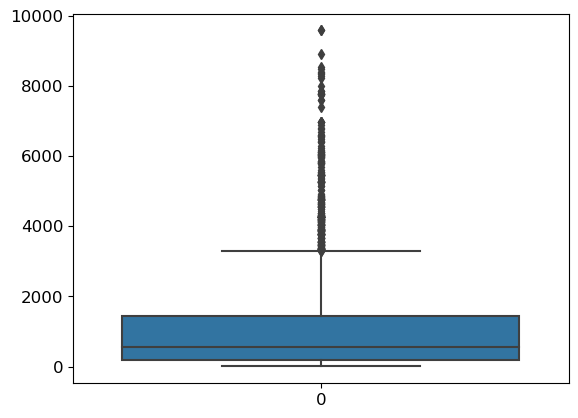

In [63]:
sns.boxplot(df['price'])

**Сделайте выводы**

- 
- 

## 3 Гипотеза

- Цены на товары, которые имеют несколько цветов, больше (многообразие цветов связано со значением цены)

<div class="alert alert-block alert-warning"> 
У нас теперь везде будут на все гипотезы одинаковые графики? =) 
</div>

Сравнить при помощи boxplot и displot цену при разных значениях other_colors, есть ли разница?

C:\Users\maxim\AppData\Local\Temp\ipykernel_14352\2013158146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


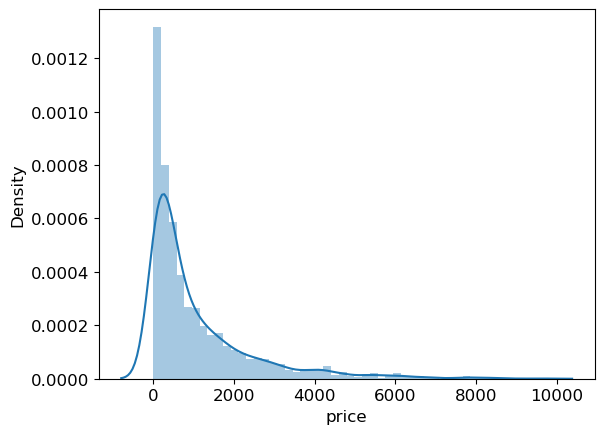

In [64]:
sns.distplot(df['price']);

<Axes: >

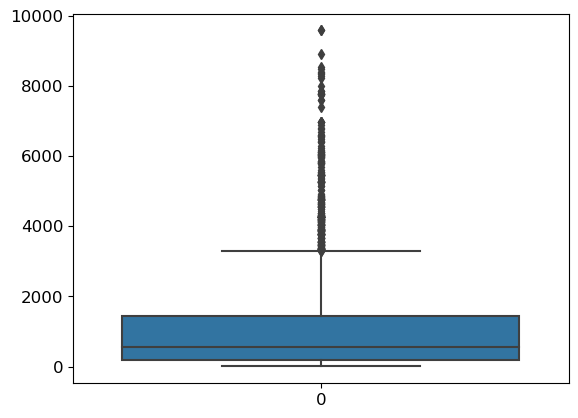

In [65]:
sns.boxplot(df['price'])

**Сделайте выводы**

- 
- 

## Ваши гипотезы

Необходимо написать как минимум еще 4 гипотезы, которые в последствии нужно проанализировать при помощи графиков
- Использовать обязательно heatmap (подсказка: его не обязательно использовать только для корреляции, можно оценивать наглядно сами числовые значения в той или иной группе), boxplot, pairplot, countplot, если необходимо, то и другие типы графиков
- В гипотезах постарайтесь задействовать такие признаки как: цена, категория, ширина, высота, глубина, discount_amount, other_colors и дргуие
- Исходить из той задачи, что мы хотим предсказать **ЦЕНУ ТОВАРА на новых данных**, постараться написать и исследовать гипотезы так, чтобы они были **понятны бизнесу со всеми пояснениями**
- Обязательно проанализировать взаимосвязь габаритов товаров в разрезе категории, а также взаимосвязь габаритов с ценой товара
- Если вы хотите создать новые признаки, то обязательно это нужно сделать с учетом бизнес-задачи, и чтобы это помогло в анализе ваших данных
- Если вы хотите как-то задействовать дизайнеров в своем анализе, лучше смотреть дизайнеры ИКЕА/НЕ ИКЕА, так как очень много уникальных значений


**Также важно учесть:**

<div class="alert alert-block alert-danger">

- Если ваша гипотеза никак не будет связана с итоговой целью напрямую/опосредовано - предсказать цену товара, то она не засчитывается

    - Например, такая гипотеза - в разных категориях есть разные дизайнеры. Не совсем понятно, о чем гипотеза, что мы хотим этим показать, какой value для нас она может принести? Таких гипотез быть не должно
- Не обязательно напрямую анализировать все признаки в разрезе цены, можно, к примеру анализировать и величину скидки, так как это нам тоже говорит, изменится цена или нет, либо анализировать габариты товаров и соответствующую скидку на них и так далее
- Также здорово посмотреть чуть дальше, чем просто цена, например, а какие товары занимают больше места на складе, потенциально и это может влиять на множество бизнес-показателей

</div> 

# Выводы

Какие из ваших гипотез подтвердились? Попробуйте сделать краткие выводы о данных на основании анализа